# Reading and splitting the data

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv('processed_data.csv')

In [90]:
data.head()

,unitNumber,timeCycles,setting1,setting2,T24,T30,T50,P15,P30,Nf,...,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,failTime,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187


In [91]:
# splitting 0.2 test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['RUL', 'unitNumber', 'failTime']), data['RUL'], test_size=0.2, random_state=42)

# Models

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import time
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## No Grid Search

### Linear Regression

In [93]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R2: {r2_lr}")


Linear Regression MSE: 1576.3317161165942, R2: 0.6549786818840013


### Lasso

In [94]:
# Initialize the Lasso Regression model
# The alpha parameter controls the degree of sparsity
lasso = Lasso(alpha=0.01)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso Regression MSE: 1578.0360481133166, R2: 0.6546056443653088


### Ridge

In [95]:
# Initialize the Ridge Regression model
# The alpha parameter controls the strength of regularization
# Adjust the alpha value based on your specific dataset
ridge = Ridge(alpha=1.0)

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}")


Ridge Regression MSE: 1576.8862426301016, R2: 0.654857309290489


### CART

In [96]:
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)

# Evaluation
mse_cart = mean_squared_error(y_test, y_pred_cart)
r2_cart = r2_score(y_test, y_pred_cart)
print(f"CART MSE: {mse_cart}, R2: {r2_cart}")

CART MSE: 2699.9287618124545, R2: 0.40905015695888713


### Random Forest

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

Random Forest MSE: 1287.4040746304822, R2: 0.7182180335296493


### XGBoost

In [98]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}, R2: {r2_xgb}")


XGBoost MSE: 1385.5552406031823, R2: 0.6967350903697223


### Comparison

In [99]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'CART', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_lasso, mse_ridge, mse_cart, mse_rf, mse_xgb],
    'R2 Score': [r2_lr,r2_lasso, r2_ridge, r2_cart, r2_rf, r2_xgb]
})

# Saving results to a CSV file
results.to_csv('model_performance.csv', index=False)

print(results)

               Model          MSE  R2 Score
0  Linear Regression  1576.331716  0.654979
1              Lasso  1578.036048  0.654606
2              Ridge  1576.886243  0.654857
3               CART  2699.928762  0.409050
4      Random Forest  1287.404075  0.718218
5            XGBoost  1385.555241  0.696735


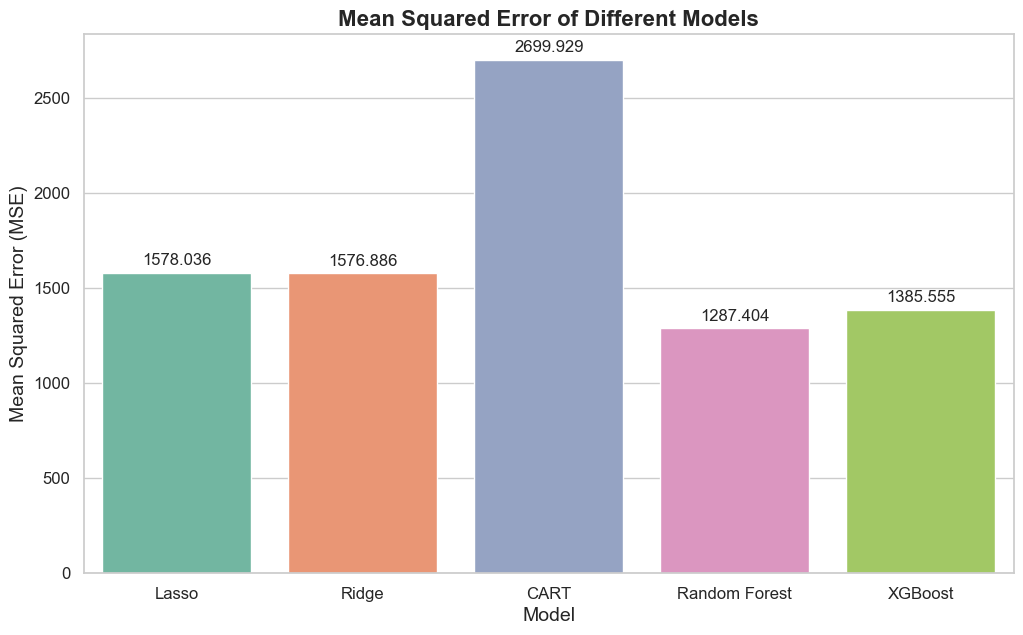

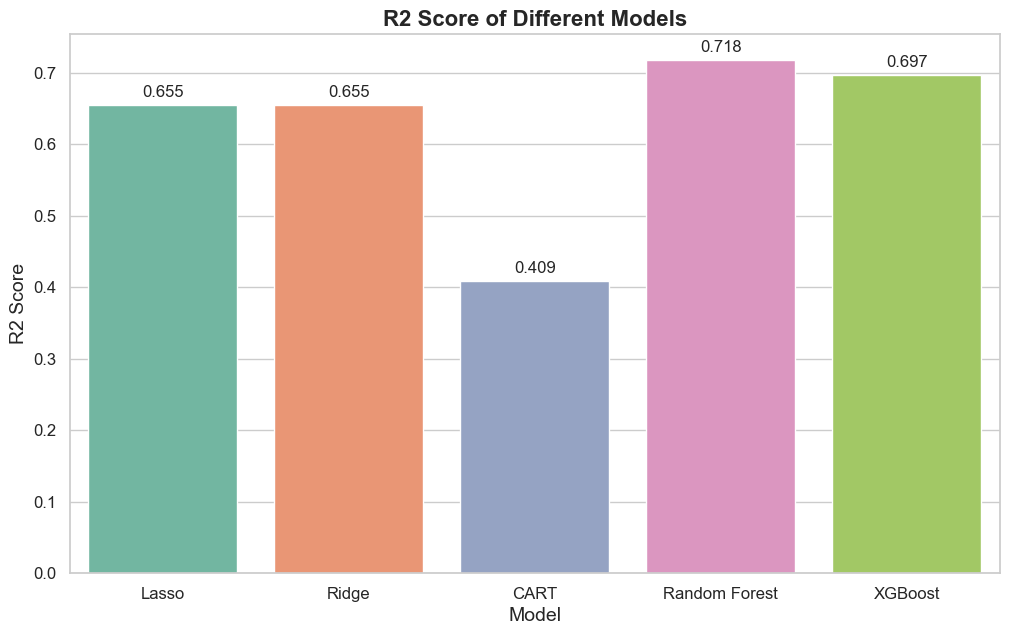

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the Linear Regression model
filtered_results = results[results['Model'] != 'Linear Regression']

sns.set(style="whitegrid", palette="pastel")
palette = sns.color_palette("Set2")

# MSE Plot
plt.figure(figsize=(12, 7))
mse_plot = sns.barplot(x='Model', y='MSE', data=filtered_results, palette=palette)
plt.title('Mean Squared Error of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating with the MSE values
for p in mse_plot.patches:
    mse_plot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points', fontsize=12)

# Save the MSE plot
plt.savefig('mse_plot_no_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()

# R2 Score Plot
plt.figure(figsize=(12, 7))
r2_plot = sns.barplot(x='Model', y='R2 Score', data=filtered_results, palette=palette)
plt.title('R2 Score of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating the bars with the R2 values
for p in r2_plot.patches:
    r2_plot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points', fontsize=12)

# Save the R2 Score plot
plt.savefig('r2_score_plot_no_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()


## With Grid Search

### CART

In [101]:
# Define the parameter grid for CART
param_grid_cart = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
cart = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search_cart = GridSearchCV(estimator=cart, param_grid=param_grid_cart, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_cart.fit(X_train, y_train)

# Best parameters
print("Best parameters for CART: ", grid_search_cart.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.2s


### Random Forest

In [102]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import itertools
# import time

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Calculate total number of combinations
# total_combinations = [len(param_grid_rf[param]) for param in param_grid_rf]
# total_combinations = np.prod(total_combinations) * 3  # Multiply by the number of CV folds

# print(f"Total combinations to test: {total_combinations}")

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor()

# # Initialize GridSearchCV with verbose set to 10 for more frequent updates
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=10, scoring='neg_mean_squared_error')

# # Start the timer
# start_time = time.time()

# # Fit the grid search to the data
# grid_search_rf.fit(X_train, y_train)

# # End the timer
# end_time = time.time()

# # Calculate and print the total duration
# total_duration = end_time - start_time
# print(f"GridSearchCV completed in {total_duration:.2f} seconds")

# # Best parameters
# print("Best parameters for Random Forest: ", grid_search_rf.best_params_)



In [103]:
# Had to run on the clusters and got these results for best RF

# Manually setting the best parameters with an updated max_features
best_params_rf = {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
rf_optimized = RandomForestRegressor(**best_params_rf)

# Fit the model on the training data
rf_optimized.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, max_features=None, n_estimators=200)

### XGBoost

In [104]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1]
}

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END colsample_bytree=0.7

### Evaluating

In [105]:
# CART Model Evaluation
cart_optimized = grid_search_cart.best_estimator_
y_pred_cart = cart_optimized.predict(X_test)
mse_cart = mean_squared_error(y_test, y_pred_cart)
r2_cart = r2_score(y_test, y_pred_cart)

# Random Forest Model Evaluation
y_pred_rf = rf_optimized.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost Model Evaluation
xgb_optimized = grid_search_xgb.best_estimator_
y_pred_xgb = xgb_optimized.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Creating a DataFrame to hold the results
results_optimized = pd.DataFrame({
    'Model': ['CART', 'Random Forest', 'XGBoost'],
    'MSE': [mse_cart, mse_rf, mse_xgb],
    'R2 Score': [r2_cart, r2_rf, r2_xgb]
})

# Saving the results to a CSV file
results_optimized.to_csv('optimized_model_results.csv', index=False)

print(results_optimized)

           Model          MSE  R2 Score
0           CART  1661.418228  0.636355
1  Random Forest  1283.983242  0.718967
2        XGBoost  1255.647520  0.725169


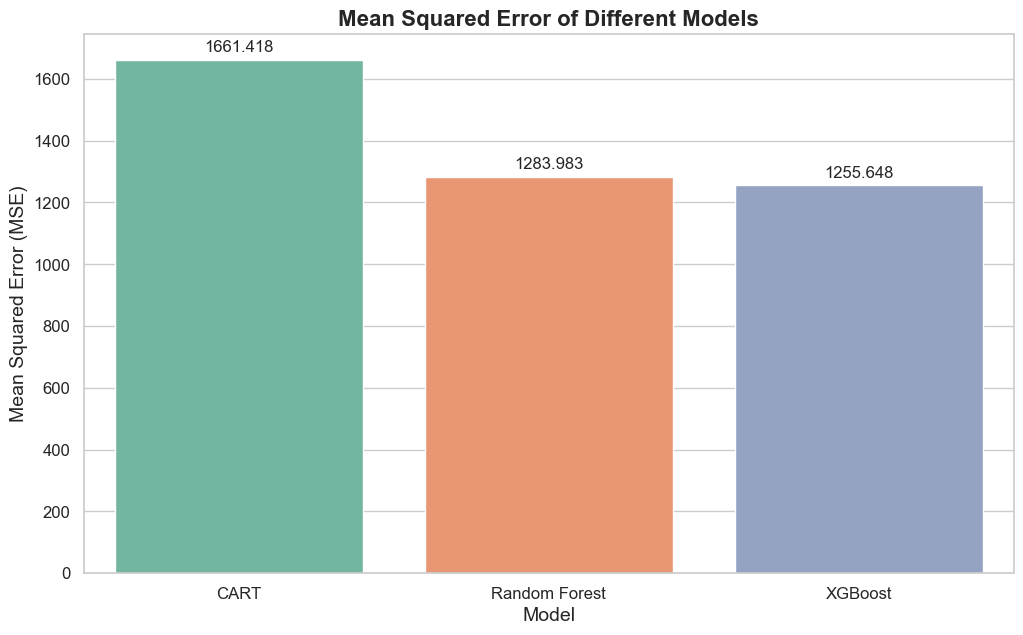

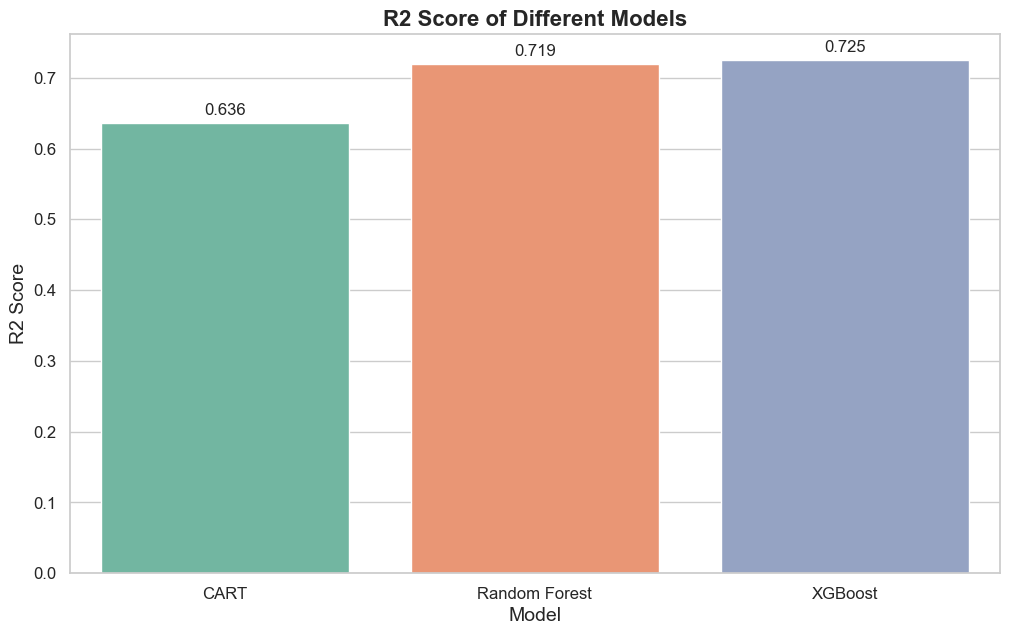

In [106]:
sns.set(style="whitegrid", palette="pastel")
palette = sns.color_palette("Set2")

# MSE Plot
plt.figure(figsize=(12, 7))
mse_plot = sns.barplot(x='Model', y='MSE', data=results_optimized, palette=palette)
plt.title('Mean Squared Error of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating with the MSE values
for p in mse_plot.patches:
    mse_plot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points', fontsize=12)

# Save the MSE plot
plt.savefig('mse_plot_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()

# R2 Score Plot
plt.figure(figsize=(12, 7))
r2_plot = sns.barplot(x='Model', y='R2 Score', data=results_optimized, palette=palette)
plt.title('R2 Score of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating the bars with the R2 values
for p in r2_plot.patches:
    r2_plot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points', fontsize=12)

# Save the R2 Score plot
plt.savefig('r2_score_plot_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()


### Feature Importance

In [107]:
# Feature names
feature_names = X_train.columns

# CART Model Feature Importances
importances_cart = cart_optimized.feature_importances_
df_importances_cart = pd.DataFrame({'Feature': feature_names, 'Importance': importances_cart}).sort_values(by='Importance', ascending=False)

# Random Forest Model Feature Importances
importances_rf = rf_optimized.feature_importances_
df_importances_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# XGBoost Model Feature Importances
importances_xgb = xgb_optimized.feature_importances_
df_importances_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb}).sort_values(by='Importance', ascending=False)

# Display the top features for each model
print("CART Model Feature Importances:\n", df_importances_cart.head())
print("\nRandom Forest Model Feature Importances:\n", df_importances_rf.head())
print("\nXGBoost Model Feature Importances:\n", df_importances_xgb.head())


CART Model Feature Importances:
        Feature  Importance
0   timeCycles    0.659986
10        Ps30    0.179899
9           Nc    0.037480
11         phi    0.028646
13         NRc    0.014015

Random Forest Model Feature Importances:
        Feature  Importance
0   timeCycles    0.540639
10        Ps30    0.140164
9           Nc    0.042686
5          T50    0.041386
11         phi    0.032274

XGBoost Model Feature Importances:
        Feature  Importance
0   timeCycles    0.372324
10        Ps30    0.179267
11         phi    0.124371
5          T50    0.100217
14         BPR    0.044395


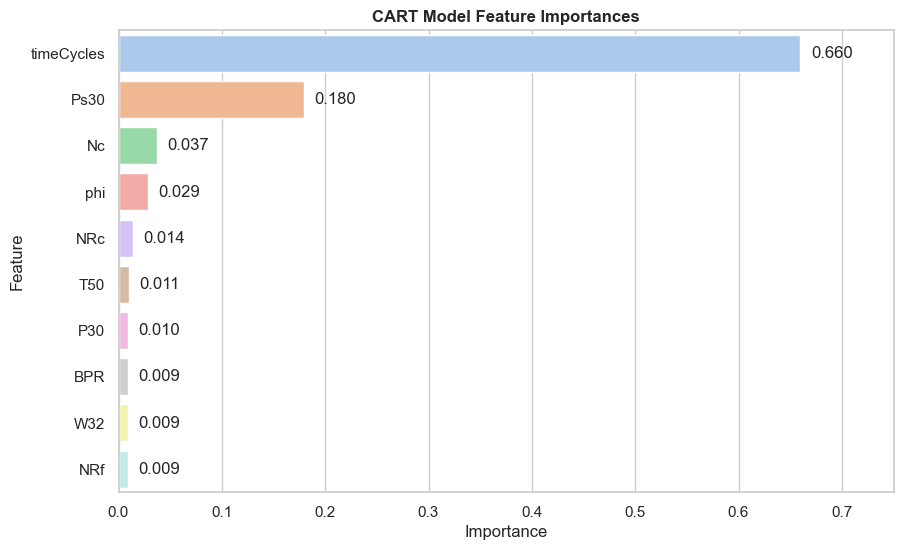

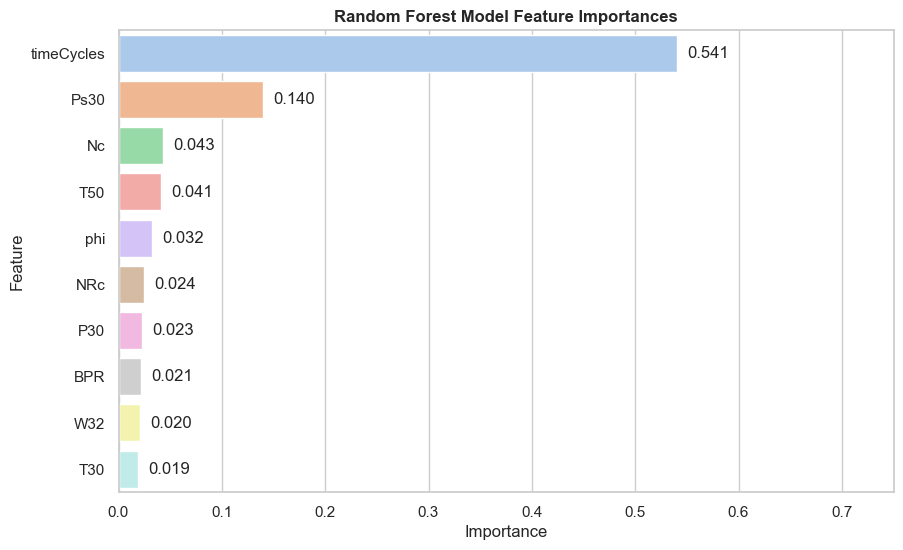

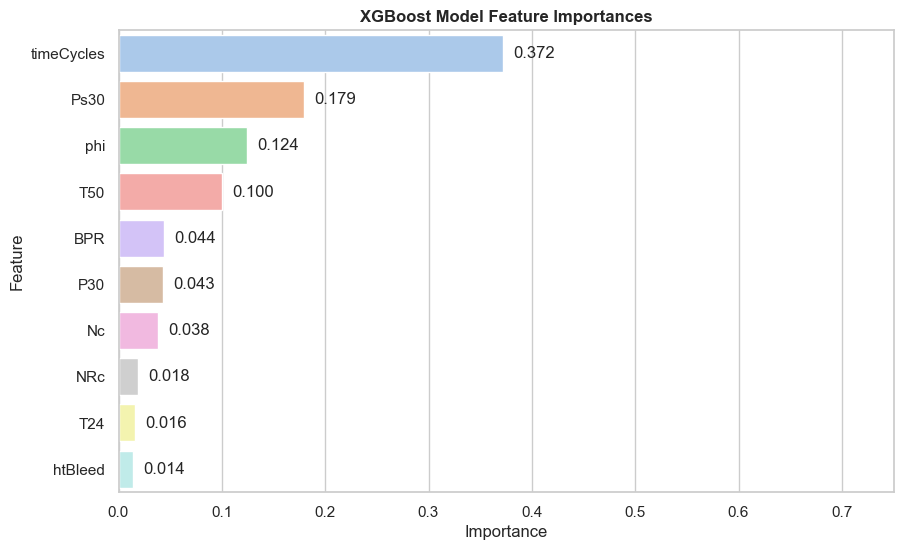

In [108]:
def plot_and_save_feature_importances(df_importances, title, filename):
    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x='Importance', y='Feature', data=df_importances.head(10))
    plt.title(title, fontweight='bold')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xlim(0, 0.75) 

    # Annotating each bar with the value of importance
    for p in plot.patches:
        width = p.get_width()    # get bar length
        plt.text(width + 0.01,   # set the text at 1 unit right of the bar
                 p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
                 '{:1.3f}'.format(width), # set variable to display, 2 decimals
                 ha = 'left',   # horizontal alignment
                 va = 'center') # vertical alignment
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save the plot as an image file
    plt.show()

# Plotting and saving feature importances for each model
plot_and_save_feature_importances(df_importances_cart, 'CART Model Feature Importances', 'cart_feature_importances.png')
plot_and_save_feature_importances(df_importances_rf, 'Random Forest Model Feature Importances', 'random_forest_feature_importances.png')
plot_and_save_feature_importances(df_importances_xgb, 'XGBoost Model Feature Importances', 'xgboost_feature_importances.png')

